<a href="https://colab.research.google.com/github/kartik1907/ML-Projects/blob/master/BigMart_Sales_Prediction_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

 
**Variable Description** :

**Item_Identifier** : Unique product ID

**Item_Weight** : Weight of product

**Item_Fat_Content** : Whether the product is low fat or not

**Item_Visibility** : The % of total display area of all products in a store allocated to the particular product

**Item_Type** : The category to which the product belongs

**Item_MRP** : Maximum Retail Price (list price) of the product

**Outlet_Identifier** : Unique store ID

**Outlet_Establishment_Year** : The year in which store was established

**Outlet_Size** :The size of the store in terms of ground area covered

**Outlet_Location_Type** : The type of city in which the store is located

**Outlet_Type** : Whether the outlet is just a grocery store or some sort of supermarket

**Item_Outlet_Sales** : Sales of the product in the particulat store. This is the outcome variable to be predicted.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/drive/My Drive/Python/DataSet/train1.csv')

In [0]:
test =  pd.read_csv('/content/drive/My Drive/Python/DataSet/test1.csv')

In [0]:
pd.set_option('display.max_columns',None)

In [6]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
634,FDE58,18.5,Low Fat,0.052025,Snack Foods,118.4124,OUT013,1987,High,Tier 3,Supermarket Type1,2370.2480
2553,NCU18,15.1,Low Fat,0.055840,Household,139.8496,OUT046,1997,Small,Tier 1,Supermarket Type1,1411.4960
7038,NCS38,NaN,Low Fat,0.000000,Household,115.2176,OUT027,1985,Medium,Tier 3,Supermarket Type3,1030.6584
5993,FDL15,NaN,Low Fat,0.081651,Meat,152.5682,OUT019,1985,Small,Tier 1,Grocery Store,152.4682
3486,DRM47,9.3,Low Fat,0.043874,Hard Drinks,191.0846,OUT045,2002,NaN,Tier 2,Supermarket Type1,1337.5922


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


**Observation :**


> train data consist of 12 variables including the Item_Outlet_Sales which tells the total sales of the items in all the Outlests.

> Test consist of all the variables that train data has excluding the Item_Outlet_Sales which needs to be predicted.








## Missing Value Treatment

### Checking Missing Values

In [9]:
## Percent Null Values in the training Data set 

Null_data_train = pd.DataFrame(train.isnull().sum(),columns=['Missing train instances'])
Null_data_train['No. Of train Instances'] = len(train)
Null_data_train['Missing Percent'] =  (Null_data_train['Missing train instances'] / Null_data_train['No. Of train Instances'])*100

## Percent Null Values in the testin Data set 

Null_data_test = pd.DataFrame(test.isnull().sum(),columns=['Missing test instances'])
Null_data_test['No. Of test Instances'] = len(train)
Null_data_test['Missing Percent'] =  (Null_data_test['Missing test instances'] / Null_data_test['No. Of test Instances'])*100

## Total Null values in the whole Data set

frame = [Null_data_train[:-1],Null_data_test]
Null_data = pd.concat(frame,1)
Null_data

,Missing train instances,No. Of train Instances,Missing Percent,Missing test instances,No. Of test Instances,Missing Percent
Item_Identifier,0,8523,0.000000,0,8523,0.000000
Item_Weight,1463,8523,17.165317,976,8523,11.451367
Item_Fat_Content,0,8523,0.000000,0,8523,0.000000
Item_Visibility,0,8523,0.000000,0,8523,0.000000
Item_Type,0,8523,0.000000,0,8523,0.000000
Item_MRP,0,8523,0.000000,0,8523,0.000000
Outlet_Identifier,0,8523,0.000000,0,8523,0.000000
Outlet_Establishment_Year,0,8523,0.000000,0,8523,0.000000
Outlet_Size,2410,8523,28.276428,1606,8523,18.843130
Outlet_Location_Type,0,8523,0.000000,0,8523,0.000000


**Observation and actionable :**

> From the above table we can say that 17.16 % of Item_Weight records and 28.27 %
of the records of Outlet size from the training data is Missing.

> Similarly, 11.45 % of Item_Weight records and 18.84 % of the records of Outlet size from the testing data is Missing.

> In both the cases the number od missing values is considerable. Hence instead of dropping the variable, we will treat it accordingly.

> Item Weight is a continuous numeric variable. Hence the same can be treated by Imputing the mean or median value in the blank records.

> On the other hands, Outlet size is a categorical variable with 3 unique instances.


> To impute the missing values in the Outlet size, we will have to look over the patter of the other categorical variables in the presence of outlet size.






























Missing value imputataion



In [0]:
train.Item_Weight.fillna(train.Item_Weight.median(), inplace=True)
test.Item_Weight.fillna(test.Item_Weight.median(), inplace=True)

In [11]:
Null_DF = train[train['Outlet_Size'].isnull()]
Null_DF_Cat = (Null_DF.select_dtypes(object)).drop(['Item_Identifier'],1)
Null_DF_Cat.apply(lambda x: x.nunique())

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier        3
Outlet_Size              0
Outlet_Location_Type     2
Outlet_Type              2
dtype: int64

In [12]:
Not_Null_DF = train[train['Outlet_Size'].notnull()]
Not_Null_DF_Cat = (Not_Null_DF.select_dtypes(object)).drop(['Item_Identifier'],1)
Not_Null_DF_Cat.apply(lambda x: x.nunique())

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier        7
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

**Observation**:


> Here We found that Out of 10 Outlet Identifier only 3 are having missing records. They are OUT010, OUT017 and OUT045


> Only Grocery stores and Super Market type 1 have Missing records


> And only Outlet Location Tier 2 and Tier 3 have missing records


In [13]:
print(pd.crosstab(Not_Null_DF_Cat.Outlet_Size,Not_Null_DF_Cat.Outlet_Location_Type),end='\n')
print(pd.crosstab(Not_Null_DF_Cat.Outlet_Size,Not_Null_DF_Cat.Outlet_Type))

Outlet_Location_Type  Tier 1  Tier 2  Tier 3
Outlet_Size                                 
High                       0       0     932
Medium                   930       0    1863
Small                   1458     930       0
Outlet_Type  Grocery Store  Supermarket Type1  Supermarket Type2  \
Outlet_Size                                                        
High                     0                932                  0   
Medium                   0                930                928   
Small                  528               1860                  0   

Outlet_Type  Supermarket Type3  
Outlet_Size                     
High                         0  
Medium                     935  
Small                        0  




> From the above inferences we can say that All the Grocery stores have small Outlet size.

> Hence, We can impute 'small' in the Outlet_Size where the Outlet type is Grocery Store.







In [0]:
train.loc[(train.Outlet_Size.isnull()) & (train.Outlet_Type=='Grocery Store'),"Outlet_Size"] = 'Small'
test.loc[(test.Outlet_Size.isnull()) & (test.Outlet_Type=='Grocery Store'),"Outlet_Size"] = 'Small'

In [0]:
train.loc[(train.Outlet_Size.isnull()) & (train.Outlet_Type=='Supermarket Type1') & (train.Outlet_Location_Type=='Tier 2'),"Outlet_Size"] = 'Small'
test.loc[(test.Outlet_Size.isnull()) & (test.Outlet_Type=='Supermarket Type1') & (test.Outlet_Location_Type=='Tier 2'),"Outlet_Size"] = 'Small'

So Here we are done with the Missing value treatment part.




We have filled the Item Weight missing values with the median values and the Outletsize section with the 'small' value.

Along with the 2 variables with Null values, We have Item_Visibility which is 0 in some records.

Logically visibility of any product cannot be 0.

Hence we will replace the same with the average visibility score

In [16]:
len(train[train.Item_Visibility==0])

526

In [0]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,train.Item_Visibility.mean())
test['Item_Visibility'] = test['Item_Visibility'].replace(0,test.Item_Visibility.mean())

## **Relational Check**

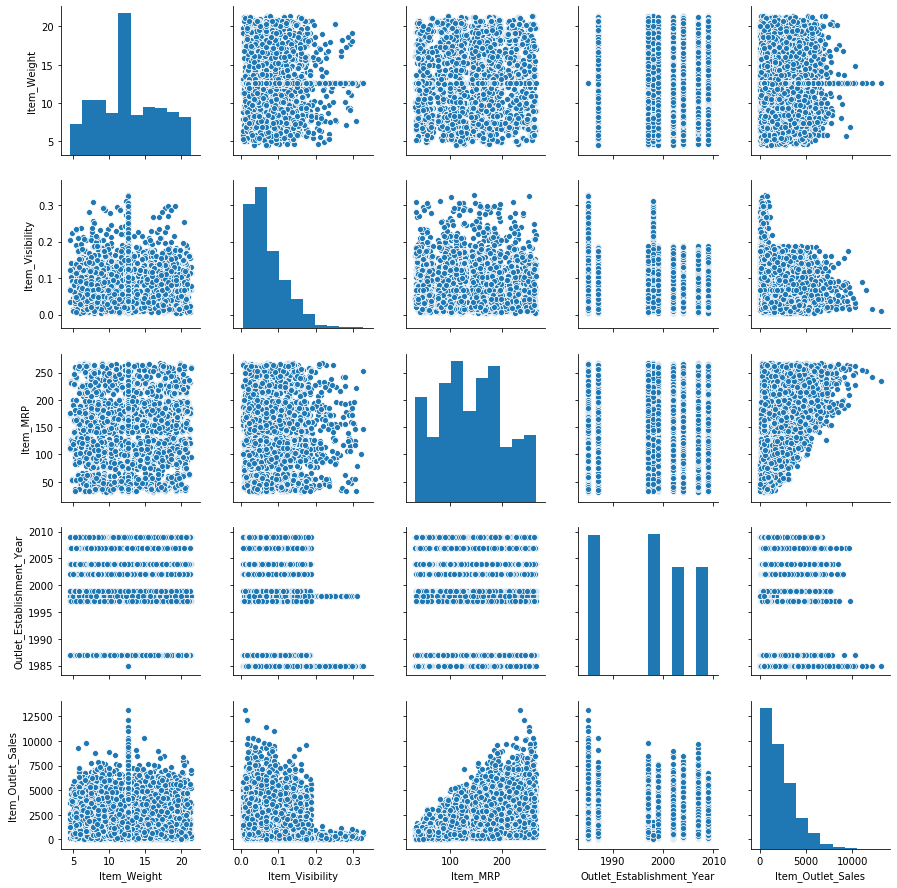

In [18]:
sns.pairplot(train)

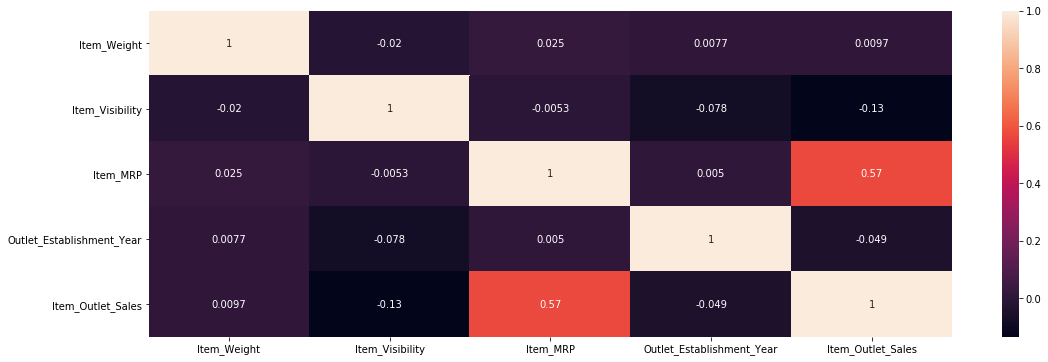

In [19]:
plt.figure(figsize=(18,6))
sns.heatmap(train.corr(),annot=True)

Observation:

> There is no Multicolinearity in the training data provided.

> Item MRP is slightly correlated with the Target variable i.e. Item_Outlet_Sales.

> Since the Item MRP is correlated with the Target variable we can drop the same.







## **Feature Engineering**

In [20]:
pd.crosstab(train.Outlet_Identifier,train.Outlet_Location_Type).T

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Location_Type,,,,,,,,,,
Tier 1,0,0,0,0,528,0,0,0,930,930
Tier 2,0,0,926,0,0,0,930,929,0,0
Tier 3,555,932,0,928,0,935,0,0,0,0


In [21]:
pd.crosstab(train.Outlet_Identifier,train.Outlet_Size).T

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Size,,,,,,,,,,
High,0,932,0,0,0,0,0,0,0,0
Medium,0,0,0,928,0,935,0,0,0,930
Small,555,0,926,0,528,0,930,929,930,0


In [22]:
pd.crosstab(train.Outlet_Location_Type,train.Outlet_Size).T

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,2785,555


In [23]:
pd.crosstab(train.Outlet_Establishment_Year,train.Outlet_Size).T

Outlet_Establishment_Year,1985,1987,1997,1998,1999,2002,2004,2007,2009
Outlet_Size,,,,,,,,,
High,0,932,0,0,0,0,0,0,0
Medium,935,0,0,0,930,0,0,0,928
Small,528,0,930,555,0,929,930,926,0


In [24]:
print(train.Item_Fat_Content.unique())
print(train.Item_Type.unique())
print(train.Outlet_Identifier.unique())
print(train.Outlet_Size.unique())
print(train.Outlet_Location_Type.unique())
print(train.Outlet_Type.unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' 'Small' 'High']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


**Observation**: 



> From the Above analysis, we can found that there are some instances in 2 features i.e. Item_Fat_Content and Item_Type where the same value has been presented in some different manner. eg. Regular written as reg. 


> Hence the same needs to be corrected using the correct value/term at all the places where incorrect data has been entered.













In [0]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat':'Low_Fat', 'low fat': 'Low_Fat','LF':'Low_Fat','Regular':'Regulr',
                                                           'reg':'Regulr'})

test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat':'Low_Fat', 'low fat': 'Low_Fat','LF':'Low_Fat','Regular':'Regulr',
                                                           'reg':'Regulr'})



In [26]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low_Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regulr,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low_Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regulr,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low_Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
train['Item_Identifier_type'] = train['Item_Identifier'].apply(lambda x :x[:2])
train['Item_Identifier_type'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier_type, dtype: int64

In [28]:
DF = train.loc[:,('Item_Identifier_type','Item_Type')]
x = DF[DF['Item_Type']=='Soft Drinks']
x.Item_Identifier_type.unique()

y = DF[DF['Item_Type']=='Hard Drinks']
y.Item_Identifier_type.unique()

array(['DR'], dtype=object)

In [29]:
pd.crosstab(train.Item_Identifier_type,train.Item_Type)

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Identifier_type,,,,,,,,,,,,,,,,
DR,0,0,0,0,140,0,0,214,0,0,0,0,0,0,445,0
FD,648,251,110,649,542,856,1232,0,0,0,425,0,64,1200,0,148
NC,0,0,0,0,0,0,0,0,520,910,0,169,0,0,0,0


Observation:


> The Item Identifier has the categry code of the items written in it. 

> Hence after decoding the same we realize that all the item types are also comes under categories.



> After decoding the Item Identifier we found 3 categories. They are

1.   DR ( Drinks )
2.   FD ( Food Products )

1.   NC ( Non Consumable )



> Hence we will categorize the Item type into these 3 categories by using Mapping function.














In [0]:
train['Item_Type']  =  train['Item_Type'].map({'Dairy':'Food_Product', 'Breads':'Food_Product', 'Breakfast':'Food_Product', 'Starchy Foods':'Food_Product',
                                               'Snack Foods': 'Food_Product', 'Baking Goods': 'Food_Product', 
                                               'Meat': 'Food_Product', 'Seafood': 'Food_Product',
                                               'Fruits and Vegetables' : 'Food_Product',
                                               'Frozen Foods': 'Food_Product', 'Canned': 'Food_Product',
                                               'Household' :'Non_Consumable', 'Health and Hygiene': 'Non_Consumable','Others': 'Non_Consumable',
                                               'Soft Drinks':'Drink' , 'Hard Drinks':'Drink'})

test['Item_Type']  =  test['Item_Type'].map({'Dairy':'Food_Product', 'Breads':'Food_Product', 'Breakfast':'Food_Product', 'Starchy Foods':'Food_Product',
                                               'Snack Foods': 'Food_Product', 'Baking Goods': 'Food_Product', 
                                               'Meat': 'Food_Product', 'Seafood': 'Food_Product',
                                               'Fruits and Vegetables' : 'Food_Product',
                                               'Frozen Foods': 'Food_Product', 'Canned': 'Food_Product',
                                               'Household' :'Non_Consumable', 'Health and Hygiene': 'Non_Consumable','Others': 'Non_Consumable',
                                               'Soft Drinks':'Drink' , 'Hard Drinks':'Drink'})
## Drinks = Hard Drinks and Soft Drinks

## Non Consumable = Health And Hygiene, House Hold, Others

## Food Products = 

Note:



> Non Consumable Items cannot have Fat in it.



> Hence the Item_Fat_Content may also have one more instance which is Fatless






In [0]:
train.loc[(train.Item_Type=='Non_Consumable'),"Item_Fat_Content"] = 'Fatless'
          

In [0]:
test.loc[(test.Item_Type=='Non_Consumable'),"Item_Fat_Content"] = 'Fatless'

In [33]:
print(train.Item_Fat_Content.value_counts())
print(train.Item_Type.value_counts())

Low_Fat    3918
Regulr     3006
Fatless    1599
Name: Item_Fat_Content, dtype: int64
Food_Product      6265
Non_Consumable    1599
Drink              659
Name: Item_Type, dtype: int64


In [34]:
print(train.Item_Fat_Content.unique())
print(train.Item_Type.unique())

['Low_Fat' 'Regulr' 'Fatless']
['Food_Product' 'Drink' 'Non_Consumable']




> The Outlet establishment year has been given in the training dataset.



> The same can be used to generate a new feature named Outlet age.

> Hence We will create one new variable i.e. Outlet Age








In [35]:
train['Outlet_age'] = 2013 - train['Outlet_Establishment_Year']

test['Outlet_age'] = 2013 - test['Outlet_Establishment_Year']
test['Outlet_age'][:5]

0    14
1     6
2    15
3     6
4    28
Name: Outlet_age, dtype: int64

In [0]:
train['Outlet_Size'] = train.Outlet_Size.map({'Medium':1, 'High':2, 'Small': 0})

test['Outlet_Size'] = test.Outlet_Size.map({'Medium':1,'High':2, 'Small': 0})


## Univariate Analysis

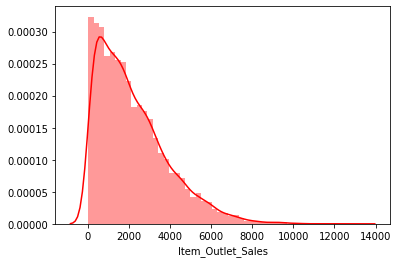

In [37]:
sns.distplot(train.Item_Outlet_Sales,color='red',label='Total Sales')

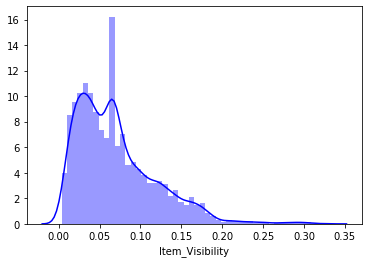

In [38]:
 sns.distplot(train.Item_Visibility,hist=True,color='blue')

## **Bivariate Analysis**

In [39]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Identifier_type',
       'Outlet_age'],
      dtype='object')

Text(0.5, 1.0, 'Total Sales from Different location')

<Figure size 432x288 with 0 Axes>

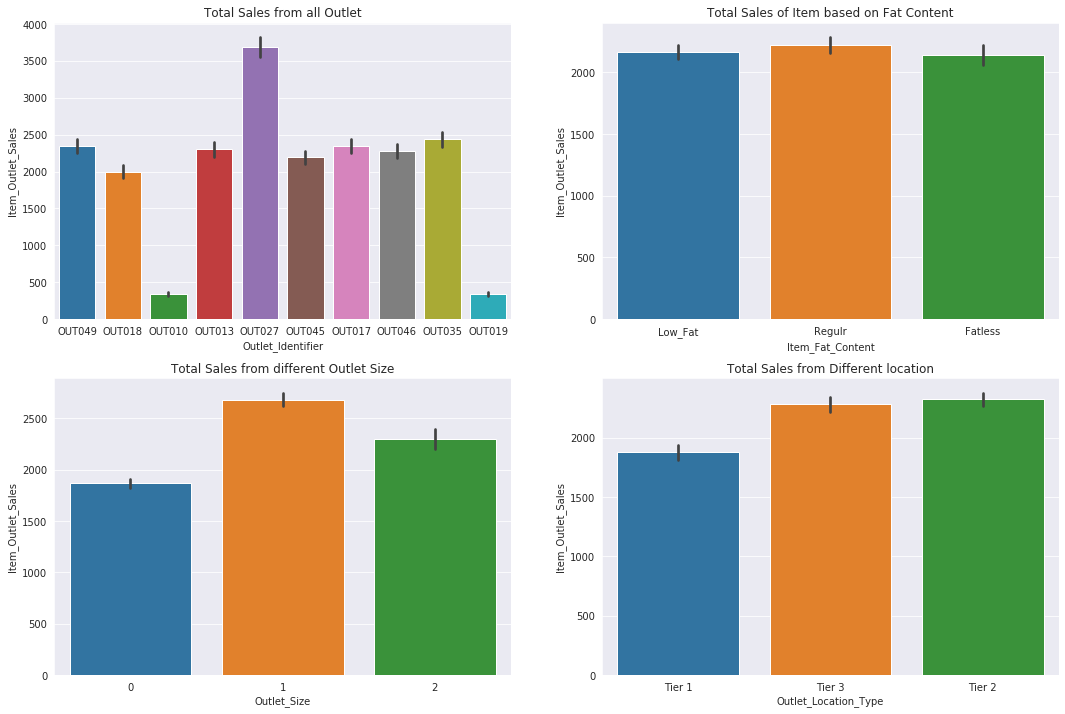

In [40]:

sns.set_style(style='darkgrid')

plt.figure(1)
plt.figure(figsize=(18,12))

plt.subplot(221)
sns.barplot(train.Outlet_Identifier,train.Item_Outlet_Sales)
plt.title('Total Sales from all Outlet')

plt.subplot(222)
sns.barplot(train.Item_Fat_Content,train.Item_Outlet_Sales)
plt.title('Total Sales of Item based on Fat Content')

plt.subplot(223)
sns.barplot(train.Outlet_Size,train.Item_Outlet_Sales)
plt.title('Total Sales from different Outlet Size')


plt.subplot(224)
sns.barplot(train.Outlet_Location_Type,train.Item_Outlet_Sales)
plt.title('Total Sales from Different location')

Text(0.5, 1.0, 'Total Sales from Different location')

<Figure size 432x288 with 0 Axes>

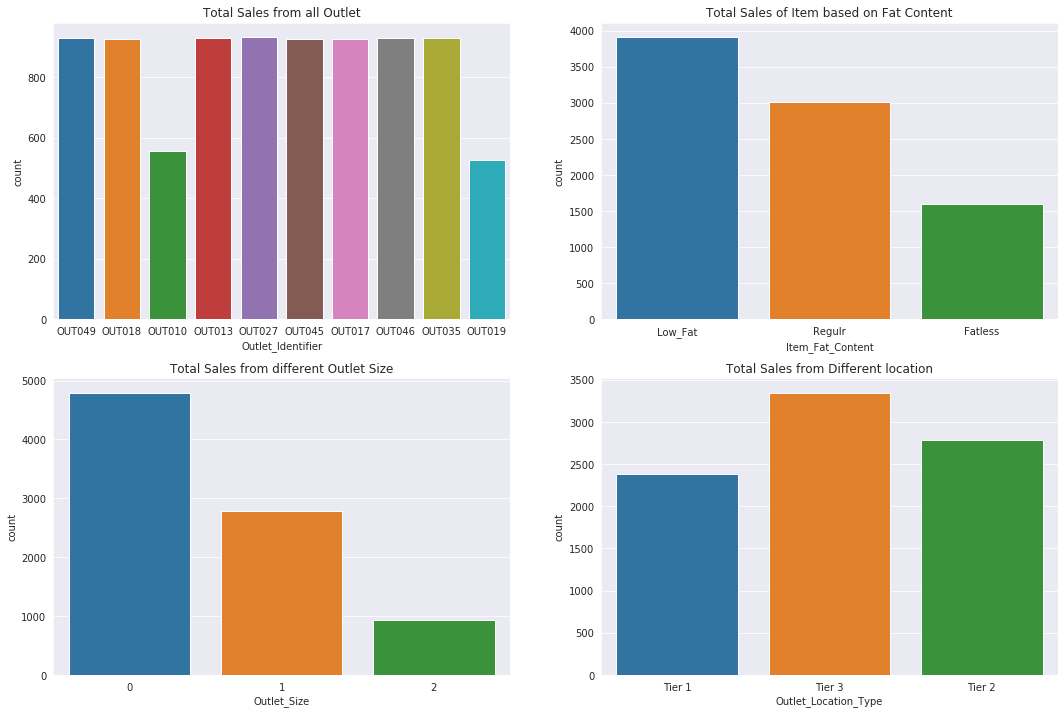

In [41]:
plt.figure(1)
plt.figure(figsize=(18,12))

plt.subplot(221)
sns.countplot(train.Outlet_Identifier)
plt.title('Total Sales from all Outlet')

plt.subplot(222)
sns.countplot(train.Item_Fat_Content)
plt.title('Total Sales of Item based on Fat Content')

plt.subplot(223)
sns.countplot(train.Outlet_Size)
plt.title('Total Sales from different Outlet Size')


plt.subplot(224)
sns.countplot(train.Outlet_Location_Type)
plt.title('Total Sales from Different location')

In [0]:
# train['Outlet_age'] =  train['Outlet_age'].astype('object')

In [0]:
# test['Outlet_age'] =  test['Outlet_age'].astype('object')

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int64
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Item_Identifier_type         8523 non-null object
Outlet_age                   8523 non-null int64
dtypes: float64(4), int64(3), object(7)
memory usage: 932.3+ KB


In [45]:
(test.isnull().sum())/len(test)

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Outlet_age                   0.0
dtype: float64

In [46]:
'''train['Outlet_Size'] = train['Outlet_Size'].astype('object')
test['Outlet_Size'] = test['Outlet_Size'].astype('object')'''

"train['Outlet_Size'] = train['Outlet_Size'].astype('object')\ntest['Outlet_Size'] = test['Outlet_Size'].astype('object')"

## Finding Outliers

In [0]:
from scipy.stats import zscore

In [0]:
num = train.select_dtypes(include=('int','float64'))

In [49]:
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_age
0,9.30,0.016047,249.8092,1999,1,3735.1380,14
1,5.92,0.019278,48.2692,2009,1,443.4228,4
2,17.50,0.016760,141.6180,1999,1,2097.2700,14
3,19.20,0.066132,182.0950,1998,0,732.3800,15
4,8.93,0.066132,53.8614,1987,2,994.7052,26


In [0]:
a = np.abs(zscore(num))

In [51]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.813420,4.227240,4.555000,9.310000,12.600000,16.000000,21.350000
Item_Visibility,8523.0,0.070213,0.048742,0.003575,0.033085,0.062517,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Outlet_Size,8523.0,0.546404,0.683084,0.000000,0.000000,0.000000,1.000000,2.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800
Outlet_age,8523.0,15.168133,8.371760,4.000000,9.000000,14.000000,26.000000,28.000000


In [52]:
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3- Q1
LR = Q1 - 1.5*IQR
UR = Q3 + 1.5*IQR
print(LR)
print(UR)

Item_Weight                    -0.725000
Item_Visibility                -0.059165
Item_MRP                      -43.899300
Outlet_Establishment_Year    1961.500000
Outlet_Size                    -1.500000
Item_Outlet_Sales           -2566.326100
Outlet_age                    -16.500000
dtype: float64
Item_Weight                    26.035000
Item_Visibility                 0.186835
Item_MRP                      323.369500
Outlet_Establishment_Year    2029.500000
Outlet_Size                     2.500000
Item_Outlet_Sales            6501.869900
Outlet_age                     51.500000
dtype: float64


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int64
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Item_Identifier_type         8523 non-null object
Outlet_age                   8523 non-null int64
dtypes: float64(4), int64(3), object(7)
memory usage: 932.3+ KB


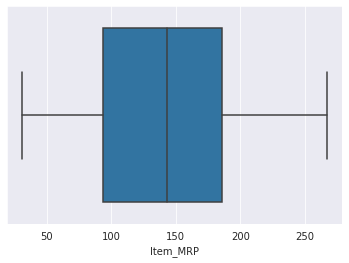

In [54]:
sns.boxplot(num.Item_MRP)

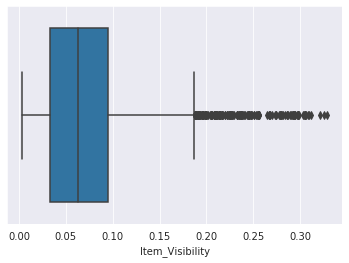

In [55]:
sns.boxplot(train.Item_Visibility)

**Observation:**


> From the above scrutiny we did not find any outlier except in the case of Item Visibility.



> The same can be avoided because of the low significance of the same in the final decision or the sale.



## **Data Transformation**

In [56]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_type,Outlet_age
0,FDA15,9.30,Low_Fat,0.016047,Food_Product,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regulr,0.019278,Drink,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228,DR,4


**Actionable** :


*   Drop the Irrelevant features from the data.
*   Items to be dropped from the data are as follow

1.   Item_Identifier

2.   Outlet_Establishment_Year



*   Since The Item Idewntifier is the identification of the products which will not be significant in the training of data.
*   New variable ' Outlet_Age ' has been made out of Outlet Establishment year hence we do not need the Outlet Establishment year anymore.





In [0]:
new_train = train.drop(train[['Item_Identifier','Outlet_Establishment_Year','Item_Identifier_type']],1)

In [0]:
new_test = test.drop(test[['Item_Identifier','Outlet_Establishment_Year',]],1)

In [59]:
new_train.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,9.30,Low_Fat,0.016047,Food_Product,249.8092,OUT049,1,Tier 1,Supermarket Type1,3735.1380,14
1,5.92,Regulr,0.019278,Drink,48.2692,OUT018,1,Tier 3,Supermarket Type2,443.4228,4


In [60]:
new_test.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_age
0,20.75,Low_Fat,0.007565,Food_Product,107.8622,OUT049,1,Tier 1,Supermarket Type1,14
1,8.30,Regulr,0.038428,Food_Product,87.3198,OUT017,0,Tier 2,Supermarket Type1,6


In [61]:
new_train.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size               int64
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
Outlet_age                int64
dtype: object

### **Normalizing the data ( Dummification of Categorical variables )**

The final engineered and cleaned data will now be normalized and made ready for training.

> All the Categorical variables will be dummified. ( One Hot Encoding ).

> Categorical variable with Ordinal nature has already been mapped as 0 , 1 and 2.





In [0]:
dummy_trains = pd.get_dummies(new_train)

In [0]:
dummy_tests = pd.get_dummies(new_test)

In [64]:
dummy_trains.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Outlet_age,Item_Fat_Content_Fatless,Item_Fat_Content_Low_Fat,Item_Fat_Content_Regulr,Item_Type_Drink,Item_Type_Food_Product,Item_Type_Non_Consumable,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1,3735.1380,14,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,1,443.4228,4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1,2097.2700,14,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,0,732.3800,15,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,8.93,0.066132,53.8614,2,994.7052,26,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


### **Normalizing the data ( Scaling the Numeric variables )**



> Once the data is dummified, We are required to scale the numeric data.

> This is because of the different nature and range of the different numeric variables.

> Methods of scaling the variables

1.   Standard Scaler

1.   Min Max Scaler
2.   Scale

2.   Z-Score


> We will scale the same using z-Score











In [0]:
from scipy.stats import zscore

In [0]:
X_train = dummy_trains.drop(['Item_Outlet_Sales'],1)

X_test = dummy_tests

Y_train = dummy_trains['Item_Outlet_Sales']

In [0]:
xtrain_sc = X_train.apply(zscore)

X_test_sc = X_test.apply(zscore)

## **Data Modelling**


> First we will import all the required regression algorithems from the respective libraries


> Define the same in Variables





In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [0]:
LR = LinearRegression(normalize=True)
DT = DecisionTreeRegressor(max_depth=20,min_samples_leaf=100)
RF = RandomForestRegressor(max_depth=20,min_samples_leaf=100)
XG = XGBRegressor()
GB = GradientBoostingRegressor(n_estimators=50)
BR = BaggingRegressor(n_estimators=50)

In [70]:
LR_predict = LR.fit(xtrain_sc,Y_train).predict(X_test_sc)
DT_predict = DT.fit(xtrain_sc,Y_train).predict(X_test_sc)
RF_predict = RF.fit(xtrain_sc,Y_train).predict(X_test_sc)
GB_predict = GB.fit(xtrain_sc,Y_train).predict(X_test_sc)
BR_predict = BR.fit(xtrain_sc,Y_train).predict(X_test_sc)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
LR_Solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':LR_predict})

LR_Solution.to_csv('Linear_Model3.csv',index=False)

In [0]:
DT_Solution = pd.DataFrame({'Item_Identifier':test['Item_Identifier'],
                            'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':DT_predict})
DT_Solution.to_csv('tree_Model3.csv',index=False)

**Decision tree gave the RMSE of 1162**

In [0]:
RF_Solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                            'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':RF_predict})
RF_Solution.to_csv('Random_Forest_Model3.csv',index=False)

**Random Forest gave the best score i.e.**

**RMSE = 1155**

In [0]:
important_feature = pd.DataFrame(RF.feature_importances_,index=xtrain_sc.columns,columns=['Importancs'])

In [95]:
important_feature.sort_values(by='Importancs',  ascending=False)[0:5]

,Importancs
Item_MRP,0.544526
Outlet_Type_Grocery Store,0.321407
Outlet_age,0.053062
Outlet_Identifier_OUT027,0.039014
Outlet_Type_Supermarket Type3,0.031527


In [0]:
GB_solution = pd.DataFrame({'Item_Identifier':test['Item_Identifier'],
                            'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':GB_predict})
GB_solution.to_csv('Gradient_Boosting.csv',index=False)

RMSE : 1155.88

In [0]:
BR_solution = pd.DataFrame({'Item_Identifier':test['Item_Identifier'],
                            'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':BR_predict})
BR_solution.to_csv('Bagging_Regresseer.csv',index=False)

Here we can infer that the Random Forest Regressor gave the best RMSE of 1155. with the most important features as mentioned below


1.   Item MRP

1.   Outlet Type

2.   Outlet Age


